# On the choices made for this project <a class="anchor" id="choices_made"></a>

## The language: Python <a class="anchor" id="language_choice"></a>

Python was the obvious choice of programming language for a number of reasons:

* I am very experienced in the use of Python for buidling utility scripts as well as fully fledged software for engineering applications. Carrying this project in Matlab would've been a hinderance for me personally.
* The Python eco-system is vastly rich with third party libraries built specifically for Data Science, Analysis and Machine Learning.
* Python is the top skill required by Data Scientists and ML Engineers in industry. Delivering this project in Python will demonstrate my ability to build an end-to-end Machine Learning pipeline.

## The development environment: Jupyter Notebook <a class="anchor" id="dev_choice"></a>

Jupyter notebook is an excellent tool to carry out exploratory data analysis and quickly building prototypes prior to productionalising any piece of software. Furthermore, notebooks offer the flexible to write and execute Python code alongside Markdown blocks (like this one) where explanatory notes can be written in neatly presented free text. Jupyter notebooks are also portable by design, making them very easy to share and reuse. Notebooks are indeed ubiquitous in the realm of Data Science and Machine Learning.

## The dataset: National Grid Historic Demand from 2009 to 2022 <a class="anchor" id="dataset_choice"></a>

The dataset selected for this project is National Grid's historic electricity demand, interconnector, hydro storage pumping, Short Term Operating Reserve (STOR), wind and solar outturn data between 2009 and 2021 [[1]](https://data.nationalgrideso.com/demand/historic-demand-data). This dataset is indeed a time series capturing the electrical demand of England and Wales for a total 13 years, it is made available under National Grid ESO Open Data Licence [[2]](https://data.nationalgrideso.com/licence). The dataset includes the following fields:

* SETTLEMENT_DATE: A date in the following format - 23-JUN-2011
* SETTLEMENT_PERIOD: An integer label refering to a specific half hourly on a given day. For example, half hourly 1 refers to 30 minutes from 00:00 to 00:30.
* ND: National Demand, the Great Britain generation requirement and it is the sum of metered generation, but excludes generation required to meet station load, pump storage pumping and interconnector exports. The demand in this field is expressed in mega watts (MW)
* TSD: Transmission System Demand, it is the transmission system generation requirement and it is calculated using National Grid ESO operational metering. This field is also expressed in MW.
* ENGLAND_WALES_DEMAND: England and Wales Demand, as ND above but on an England and Wales basis. It is also expressed in MW.
* EMBEDDED_WIND_GENERATION: This is an estimate of the GB wind generation from wind farms which do not have Transmission System metering installed. In other words, this is the total output of wind farms connected to distribution networks instead of the transimission network. Such wind farms are metered by the local distribution network operator (DNO) which then passes utilisation data to National Grid. This field is also expressed in MW.
* EMBEDDED_WIND_CAPACITY: This is National Grid ESO’s best view of the installed embedded wind capacity in GB, it is expressed in MW.
* EMBEDDED_SOLAR_GENERATION: This is an estimate of the GB solar generation from photovoltaic (PV) panels. In other words, this is the total output of PV farms connected to distribution networks instead of the transimission network. Such wind farms are metered by the local distribution network operator (DNO) which then passes utilisation data to National Grid. This field is also expressed in MW.
* EMBEDDED_SOLAR_CAPACITY: This is National Grid ESO’s best view of the installed embedded solar capacity in GB, it is expressed in MW.
* NON_BM_STOR: Non-Balancing Mechanism Short-Term Operating Reserve expressed in MW. STORs are a special kind of generators, they act as a high availability quick-response generators that National Grid utilise to keep the system stable when demand exceeds forecasted generation. This usually happens during unplanned peak events. STORs are usually diesel fuelled reciprocating engines.
* PUMP_STORAGE_PUMPING: Electrical power from pump storage facilities, expressed in MW.
* IFA_FLOW: The flow of power in the first France - GB interconnector, expressed in MW.
* IFA2_FLOW: The flow of power in the second France - GB interconnector, expressed in MW.
* BRITNED_FLOW: The flow of power in the Netherlands - GB interconnector, expressed in MW.
* MOYLE_FLOW: The flow of power in the Scotland - Northern Ireland interconnector, expressed in MW.
* EAST_WEST_FLOW: The flow of power in the Wales - Ireland interconnector, expressed in MW.
* NEMO_FLOW: The flow of power in the Belgium - GB interconnector, expressed in MW.
* NSL_FLOW: The flow of power in the Norway - GB interconnector, expressed in MW.

A copy of the dataset used in this project can be found on my github page https://github.com/bahij-youssef/NG_dataset

## The motivation <a class="anchor" id="motivation"></a>

The energy industry is undergoing a tremendous digital transformation with the sole aim to achieve the Net Zero target in order to tackle the climate change crisis head on. Network and system orperators are heavily focussing on extracting the optimal amount of value from their respective assets without shortening their operational lifespan. In order to achieve this, more advanced forecasting techniques will be required going forward.

This project seems to be the perfect opportunity to experiment with some of the latest machine learning time series forecasting techniques such as gradient boosting and Long Short Term Memory. Furthermore, my domain expertise in power systems engineering accrued over the last 12 years will be of tremendous help when selecting features and predictors as well as trying to understand the effectiveness of each model.

## Models used in this project

The prediction target in this project is the GB electricity demand, a continous variable. It is therefore imperative to use Regression models to train then predict the target variable. A Classifier model will not work on this dataset. With this in mind, the following models will be used:

* **Linear Regression model**: This is the most basic regression model, it will be used as the baseline.
* **XGBoost model**: This is an Ensemble learning based model. It utilises gradient descent and tree boosting to train on a dataset.
* **Ridge Regression model**: This is an optimised version of the linear regression model

More elaborate explanations will be provided about the model selection and how each one works in the implementation stage.

## Evaluation metric

Regression and Classification models have different evaluation metrics. Regression metrics mainly focus the **error** between test/train data and prediction data [3]. These are:

* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* Root Mean Squared Logarithmic Error (RMSLE)
* Mean Percentage Error (MPE)
* Mean Absolute Percentage Error (MAPE)
* R Squared

The chosen evaluation metrics throughout this project are the MSE, RMSE and MAPE.

## Libraries required for this project

The block of code below simply imports the necessary libraries used throughout this project. A comment above each import gives a succinct one-line summary of the purpose of each library in the context of this project.

In [1]:
# Data ingestion & manipulation
import pandas as pd

# Linear algebra
import numpy as np

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# File path manipulation
from pathlib import Path

# Manipulation of date/time objects
from datetime import datetime
from datetime import timedelta as td

# Warnings supression to keep the notebook outputs clean
import warnings
warnings.filterwarnings('ignore')

# Statistical tools for time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose

# Data pre-processing, standardisation
from sklearn.preprocessing import RobustScaler

# OLS regression model
from sklearn.linear_model import LinearRegression, Ridge

# XGBoost Regression model
import xgboost as xgb
from xgboost import XGBRegressor

# Evaluation metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

# Fetching & ingesting raw data files

The dataset chosen for this project was not available in a single CSV file. Instead, it was scattered over a number of files (one for each year) requiring the need to fetch (download) each one ready for ingestion into a single dataframe. The data ingestion is shown in the code block below, complete with comments explaining each step.

In [2]:
# Define the path to the folder container the fragmented dataset
p = Path(r"C:\Users\Bahij\Dropbox\MSc Bahij\CONL708 Machine Learning\Assignments\Final")

# Collect the path of each file in a list
# The call glob('*20*.csv') will look for any csv file
# Where the file name contains the number 20 within
# File path p defined above.
data_files = list(p.glob('*20*.csv'))

# Initialise the df that will contain the entire dataset
df = pd.DataFrame()

# Loop through the files and load into dataframe
for file in data_files:
    print(f"[+] Reading data from {file.name}")
    
    # Load the file contents into a temporary dataframe
    tmp = pd.read_csv(file)
    
    # Concatenate the temporary dataframe 
    df = pd.concat([df,tmp])

[+] Reading data from demanddata_2009.csv
[+] Reading data from demanddata_2010.csv
[+] Reading data from demanddata_2011.csv
[+] Reading data from demanddata_2012.csv
[+] Reading data from demanddata_2013.csv
[+] Reading data from demanddata_2014.csv
[+] Reading data from demanddata_2015.csv
[+] Reading data from demanddata_2016.csv
[+] Reading data from demanddata_2017.csv
[+] Reading data from demanddata_2018.csv
[+] Reading data from demanddata_2019.csv
[+] Reading data from demanddata_2020.csv
[+] Reading data from demanddata_2021.csv


## Data cleaning

The crucial next step is to have peak into the dataset and understand the cleaning steps required in order to make the data ready for training and testing. Pandas provides all the necessary tools needed to explore the dataset with ease. 

### `df.info()`

The first call is to the **info()** function, it provides a quick summary of the size of the dataset, the column names, the data type & number of null values in each column. In the context of the National Grid dataset, the info() function call provides the following insight:

* Contains 227904 rows & 18 columns
* Does not contain any null values
* Integers are the most dominant data type

Not having any null values in the dataset is a huge bonus and will save many cleaning steps.

### `df.head()`, `df.tail()` and `df.sample(5)`

These commands provide a view of the first five rows, last five rows and randomly selected five rows respectively. The first issue that jumps out is the date format in the SETTLEMENT_DATE column, it is represented in a none-standard format and must be converted into YYYY-MM-DD format before feeding the data to a machine learning model. The second issue that will require fixing is the SETTLEMENT_PERIOD (half-hourly) entries. These are represented as an integer label instead of the half-hourly itself; for example half-hourly 23:30 is represented by the label 47. Converting labels to actual half-hourlies is necessary prior to training any ML models.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227904 entries, 0 to 17519
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SETTLEMENT_DATE            227904 non-null  object 
 1   SETTLEMENT_PERIOD          227904 non-null  int64  
 2   ND                         227904 non-null  int64  
 3   TSD                        227904 non-null  int64  
 4   ENGLAND_WALES_DEMAND       227904 non-null  int64  
 5   EMBEDDED_WIND_GENERATION   227904 non-null  int64  
 6   EMBEDDED_WIND_CAPACITY     227904 non-null  int64  
 7   EMBEDDED_SOLAR_GENERATION  227904 non-null  int64  
 8   EMBEDDED_SOLAR_CAPACITY    227904 non-null  int64  
 9   NON_BM_STOR                227904 non-null  int64  
 10  PUMP_STORAGE_PUMPING       227904 non-null  int64  
 11  IFA_FLOW                   227904 non-null  int64  
 12  IFA2_FLOW                  227904 non-null  int64  
 13  BRITNED_FLOW               227

In [4]:
df.head()

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW
0,01-JAN-2009,1,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,NaN
1,01-JAN-2009,2,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,NaN
2,01-JAN-2009,3,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,NaN
3,01-JAN-2009,4,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,NaN
4,01-JAN-2009,5,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,NaN


In [5]:
df.tail()

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW
17515,31-DEC-2021,44,25718,26607,23602,2005,6527,0,13080,0,17,-272,-4,1052,321,504,853,693.0
17516,31-DEC-2021,45,24571,25848,22621,2056,6527,0,13080,0,19,-658,-4,1043,321,504,658,693.0
17517,31-DEC-2021,46,23743,25035,21850,2107,6527,0,13080,0,22,-670,-4,1016,321,504,642,663.0
17518,31-DEC-2021,47,22821,23657,21026,2189,6527,0,13080,0,24,-212,-4,624,298,437,31,289.0
17519,31-DEC-2021,48,22342,23757,20678,2270,6527,0,13080,0,623,-192,-4,624,284,305,0,240.0


In [6]:
df.sample(5)

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW
4567,06-APR-2017,10,24137,26138,22046,596,5108,0,11750,0,1501,1699,0,854,196,125,0,NaN
6681,20-MAY-2010,12,25411,29306,22873,17,2236,0,24,0,1332,-1914,0,0,-149,0,0,NaN
11600,30-AUG-2019,35,27329,28105,24650,3014,6182,2590,13080,75,11,-334,0,-6,65,152,0,NaN
377,08-JAN-2011,42,41477,42534,37189,1356,1730,0,82,0,5,1989,0,0,-452,0,0,NaN
1657,04-FEB-2012,26,46107,47892,41815,854,1950,112,1303,0,14,-1099,0,661,-72,0,0,NaN


### Creating a datetime index

The function `combine_datetime()` declared in the code block below will use the label (integer) in the SETTLEMENT_PERIOD column to extract the actual half-hourly then combine it with the date component from the SETTLEMENT_DATE column. The date and time components will then be combined into a single date/time column. The combined column titled `'datetime'` will act as the main time series index. The two columns can be discarded once they are combined.

Once the date and time are combined, any duplicates must be dropped to ensure the training phase is not biased. Duplicates in a time series usually occur if the data is collected using a timezone that adheres to daylight saving time adjustment. This is indeed true for this dataset (British Summer Time).

It is always worth checking if such changes have been implemented correctly using `df.sample(5)`.

In [7]:
# Convert SETTLEMENT_DATE entries to actual datetime objects
df['SETTLEMENT_DATE'] = pd.to_datetime(df['SETTLEMENT_DATE'])

# Dummy datetime object is required because timedelta can't handle time only objects (known quirk)
dummy_date = datetime(2022,2,26,0,0,0)

# The function below will use the label (integer) in the SETTLEMENT_PERIOD
# column to extract the actual half-hourly then combine the date column
# and time column into a single date/time column.
# This combined column will act as the main
# time series index.
def combine_datetime(date_col, time_col):
    dummy_date = datetime(2022,2,26,0,0,0)
    half_hourly = (dummy_date + td(minutes=30*time_col)).time().strftime('%X')
    date_col = date_col.strftime('%Y-%m-%d')
    
    return f"{date_col} {half_hourly}"

# Apply the combine_datetime function to SETTLEMENT_DATE & SETTLEMENT_PERIOD and store
# the output in a new columns titles datetime
df['datetime'] = df.apply(lambda x: combine_datetime(x['SETTLEMENT_DATE'],x['SETTLEMENT_PERIOD']),axis=1)
df['datetime'] = pd.to_datetime(df['datetime'])

# Ensure any duplicates are dropped
df.drop_duplicates(subset='datetime', inplace=True)

df = df.set_index('datetime').asfreq('30T')
df.drop(columns=['SETTLEMENT_DATE','SETTLEMENT_PERIOD'], inplace=True)

### Further cleaning driven by visualisation

The dataset may require further cleaning, however, at times cleaning requirements may not become apparent without visualising the dataset in question. In the context of this project, the column of interest is the Transmission System Demand with the `'TSD'` label. The logical next step is to visualing this specific time series.

The line plot of `'TSD'` shows that the system demand has dropped to 0 at times between 2009 and 2021. This is obviously corrupt data as it is impossible for the demand of the entire GB system to drop to 0, such a scenario would be disastreous. It is therefore safe to replace those 0 entries using linear interpolation.

A post-cleaning line plot shows that the time series is ready for use.

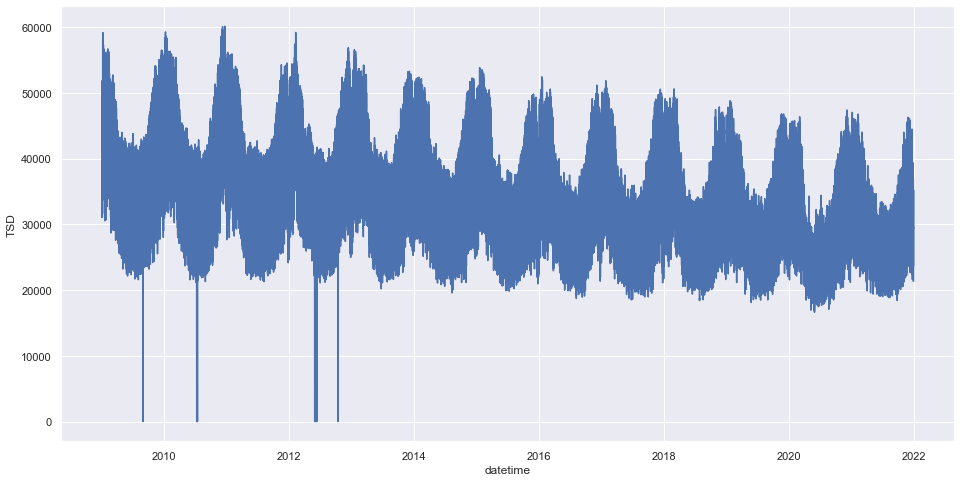

In [8]:
# Set the standard plot size throughout the notebook
sns.set(rc = {'figure.figsize':(16,8)})

# Line plot using Seaborn
sns.lineplot(x=df.index,y='TSD',data=df)
plt.show()

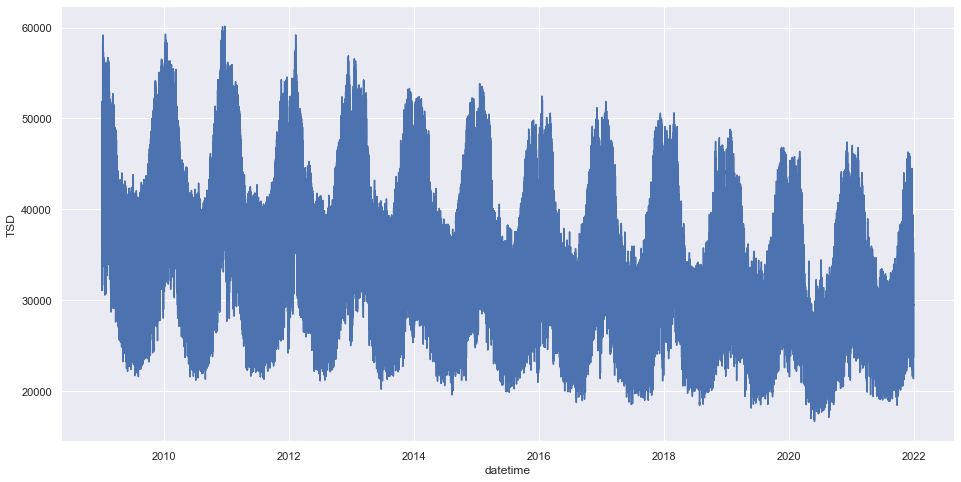

In [9]:
# Cleaning spurious 0 values
df['TSD'].replace(to_replace=0, value=np.nan, inplace=True)
df['TSD'].interpolate(inplace=True)
sns.lineplot(x=df.index,y='TSD',data=df)
plt.show()

# Basic time series analysis

Carrying out basic time series analysis will help identify any trends and patterns embedded in the dataset. In order to achieve, the time series will be decomposed into three components:

* Trend component
* Seasonal component
* Residual component

It is worth noting that the residual component describes the noise or randomness in a time series. The decomposition will be done using `statsmodels` library.

In [10]:
# seasonal_decompose needs a dataframe with a datetime index
series = df[['TSD']].copy()

HALF_HOURLY_FACTOR = 48

# decomposing the time-series, with the frequency being 48 half-hours per 365 days
decomposed = seasonal_decompose(series['TSD'], model='additive',period=HALF_HOURLY_FACTOR*365)

## The trend

The trend here is clearly downwards. This indicates that over time, the global use of electricity in the UK has been decreasing. This makes sense; over the last 10 years domestic appliances, lighting solutions as well industrial & commercial machinery have become very energy efficient.

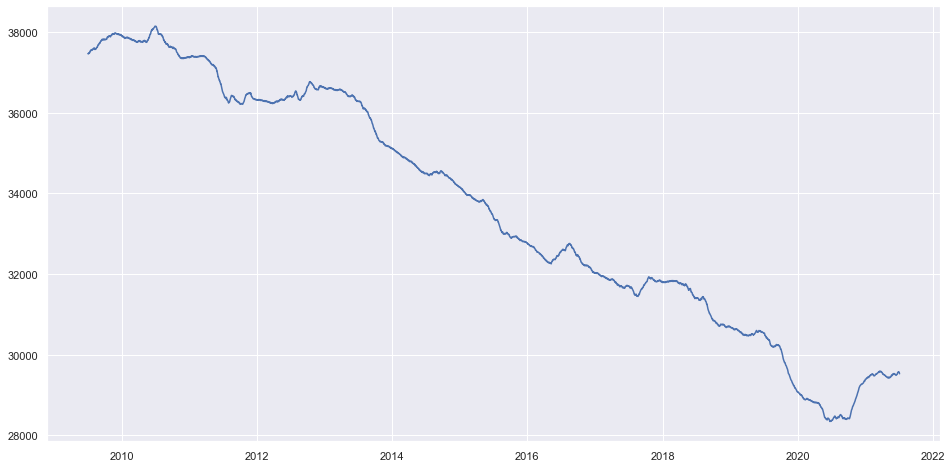

In [11]:
plt.plot(decomposed.trend)
plt.show()

## The seasonality

Seasonality in the GB electricity demand is very prominent indeed. This can be seen on the daily scale, weekly scale and yearly scale (the natural seasons of the year). It is interesting to see that the minimum yearly demand occurs in the summer season; this makes sense since the use of air conditioning in the summer is not a mainstream practice.

### Overall seasonality

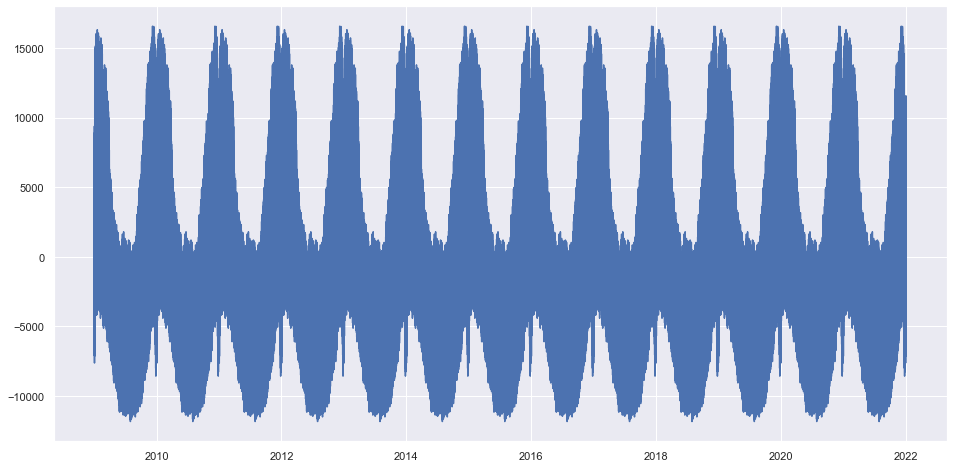

In [12]:
plt.plot(decomposed.seasonal)
plt.show()

### Yearly seasonality

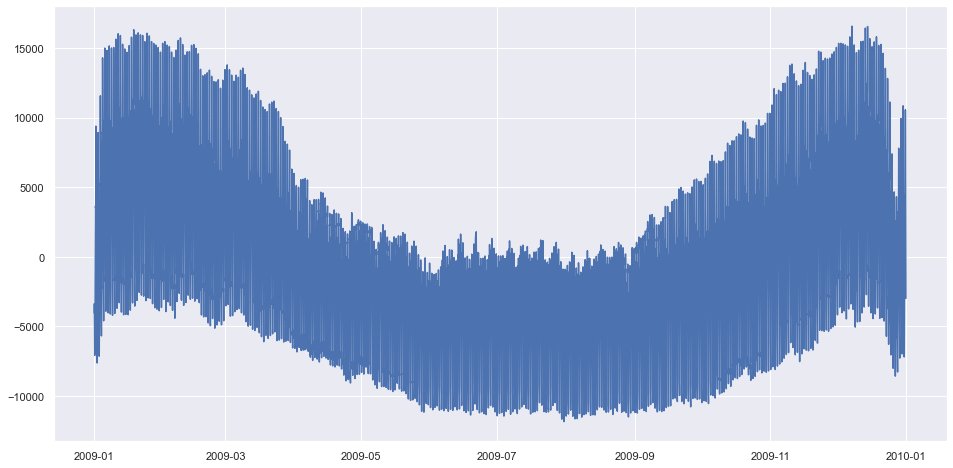

In [13]:
plt.plot(decomposed.seasonal[:HALF_HOURLY_FACTOR*365])
plt.show()

### Weekly seasonality

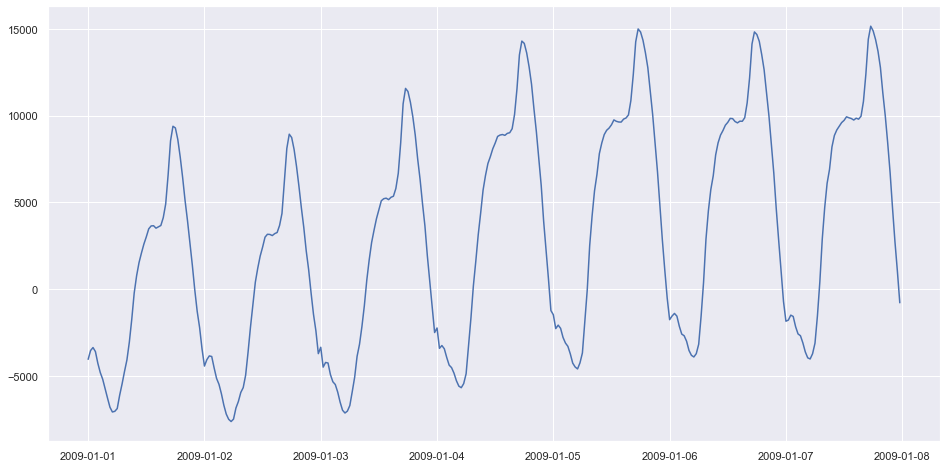

In [14]:
plt.plot(decomposed.seasonal[:HALF_HOURLY_FACTOR*7])
plt.show()

### Daily Seasonality

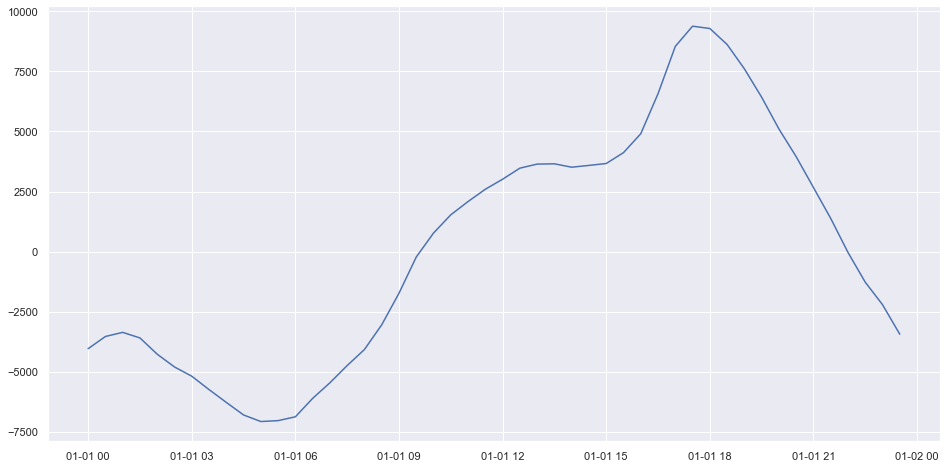

In [15]:
plt.plot(decomposed.seasonal[:HALF_HOURLY_FACTOR*1])
plt.show()

## The residual element

This is usually the compoment that is most difficult to predict and forecast. This where human randomness comes into play, it can be caused by a number of events some of which are impossible to take into consideration.

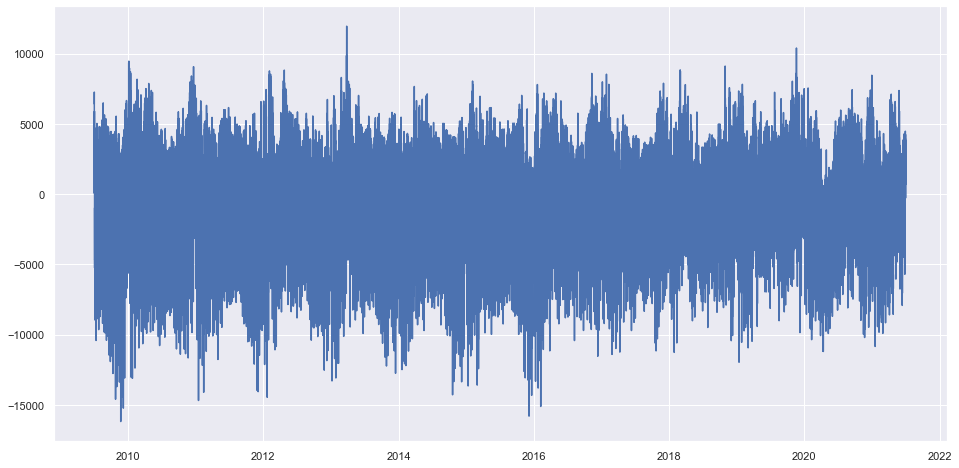

In [16]:
plt.plot(decomposed.resid)
plt.show()

# Feature engineering

Feature engineering is an essential step when preparing a dataset for machine learning models. It is particularly important for time series data because of the simplicity of such a dataset. The concept of inputs and outputs simply does not exist in time series datasets [[4]](https://machinelearningmastery.com/basic-feature-engineering-time-series-data-python/); it is therefore the responsibility of the Data Scientis or ML Engineer to create such features. Extracted features will consequently become the main predictors in the chosen machine learning models.

Time series features can be split into four categories [[4]](https://machinelearningmastery.com/basic-feature-engineering-time-series-data-python/) [[5]](https://medium.com/data-science-at-microsoft/introduction-to-feature-engineering-for-time-series-forecasting-620aa55fcab0):

* Date Time features: these are extracted directly from the date and time components and can be the day of the week, the month, the quarter, the hour etc.
* Lag features: given a record **_t_** the time series is shifted or lagging by **_n_** steps (can be days, hours, weeks etc. depending on the time series), this type of features allows the machine learning model to establish a relationship between the record **_t_** and **_t - n_**. In simpler words, lag features allow ML models to look in the past of a time series for patterns.
* Rolling window statistics: this feature allows for statistical caluclations to be done on a rolling window throughout the time series.
* Expanding window statistics: Similar to the rolling window stats but the window expands instead.

In the context of this project, the date time features and lag features will be used as they are both essential for forecasting with regression models. The function `ts_features` defined in the code block below will create date time and lag features depending on the user's input parameters. Something worth noting here is the fact that lag features create `NaN` field by design. Those `NaN` fields are dealt with by replacing them with the mean of each lag feature.

In [17]:
def ts_features(df, target, lag=None, freq='D', split=False):
    
    # Take a copy of the TSD column along with the datetime index
    forecast_df = df[[target]].copy()

    # Extract date time features
    forecast_df['dow'] = forecast_df.index.dayofweek
    forecast_df['doy'] = forecast_df.index.dayofyear
    forecast_df['year'] = forecast_df.index.year
    forecast_df['month'] = forecast_df.index.month
    forecast_df['quarter'] = forecast_df.index.quarter
    forecast_df['hour'] = forecast_df.index.hour
    forecast_df['minute'] = forecast_df.index.minute
    forecast_df['woy'] = forecast_df.index.weekofyear
    forecast_df['dom'] = forecast_df.index.day # Day of Month

    # The season feature has to be extracted using a customer function
    forecast_df['season'] = forecast_df['month'].apply(lambda month_number: (month_number%12 + 3)//3)
    
    # Only if lag window is specified
    if lag:
        for i in range(1,lag+1):
            forecast_df[f"lag_{i}"] = forecast_df.shift(i, freq=freq)[target]
            
            # Deal with NA values resulting from lag
            mean_val = forecast_df[f"lag_{i}"].mean()
            forecast_df[f"lag_{i}"].fillna(mean_val,inplace=True)
    else:
        pass
    
    # Splitting the dataset into features and target ready for training
    if split:
        x = forecast_df.drop(columns=['TSD'])
        y = forecast_df[['TSD']]
        
        return x, y
    
    # Or just return the whole dataframe
    else:
        return forecast_df

In [18]:
# A lag of 365 days was selected to ensure the yearly seasonality is captured by the ML model
# This will also encapsulate the weekly  and daily seasonality
X, y = ts_features(df, 'TSD', lag=365, freq='D', split=True)

# Linear Regression - Ordinary Least Squares

This is the most basic but also most widely known regression model [6]. It was selected here mainly to act as the baseline model, it should be good enough to output decent forecasts but may not captures the complexity of the time-series and may result in slightly worst evaluation metrics when compared to the other two proposed models.

## Splitting into training & testing datasets

This step is mandatory, without it the evaluation of a model is near impossible. In this case specifically, the training set will contain 12 years worth of data whilst the testing set will contain the last year of the original dataset.

In [20]:
test_window = HALF_HOURLY_FACTOR * 365 # A whole year

X_train, X_test = X[:-test_window].copy(), X[-test_window:].copy()
y_train, y_test = y[:-test_window].copy(), y[-test_window:].copy()

## Further pre-processing

Most regression models are sensitive to scale (with a few exceptions) [6], it is therefore required to use a scaling transfomer to normalise [7] the dataset for optimal model performance.

In [21]:
# Define the scalers for features and target
feature_scaler = RobustScaler()
target_scaler = RobustScaler()

# Fit and transform features
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Fir and transform target
y_train_scaled = target_scaler.fit_transform(y_train)
y_test_scaled = target_scaler.transform(y_test)

# Ensure the size of each matrix and vector is as expected
X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape

((210384, 375), (17520, 375), (210384, 1), (17520, 1))

## Train the model

In [22]:
%%time
# Declare the regression model
ols_model = LinearRegression()

# Train it with the scaled train features
ols_model.fit(X_train_scaled,y_train_scaled)

Wall time: 2.72 s


LinearRegression()

## Use the model to predict/forecast

The model is used to forecast an entire year in advance.

In [23]:
%%time
ols_forecast = X_test.copy()
ols_forecast['TSD_forecast'] = ols_model.predict(X_test)

Wall time: 31.3 ms


## Plot the results

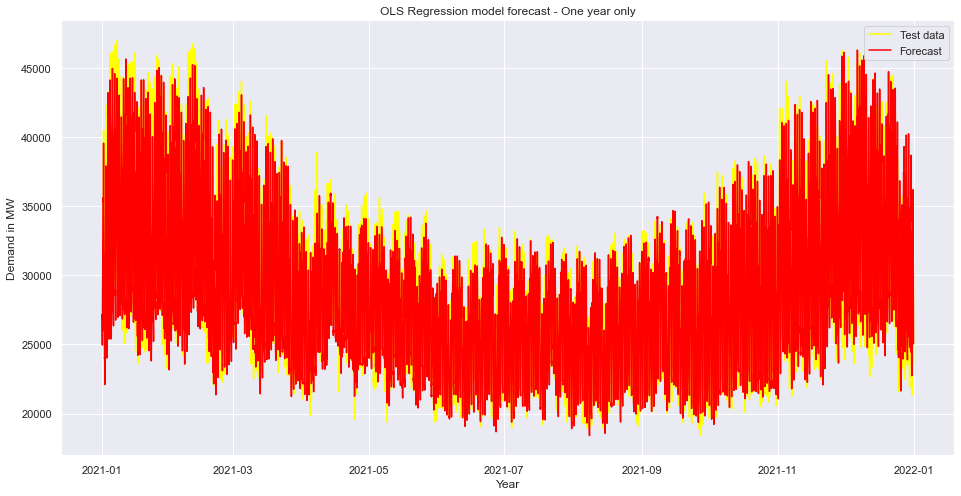

In [24]:
plt.plot(y_test['TSD'], color='yellow', label='Test data')
plt.plot(ols_forecast['TSD_forecast'],color='red', label='Forecast')

plt.xlabel("Year")
plt.ylabel("Demand in MW")
plt.legend(loc='best')
plt.title('OLS Regression model forecast - One year only')
plt.show()

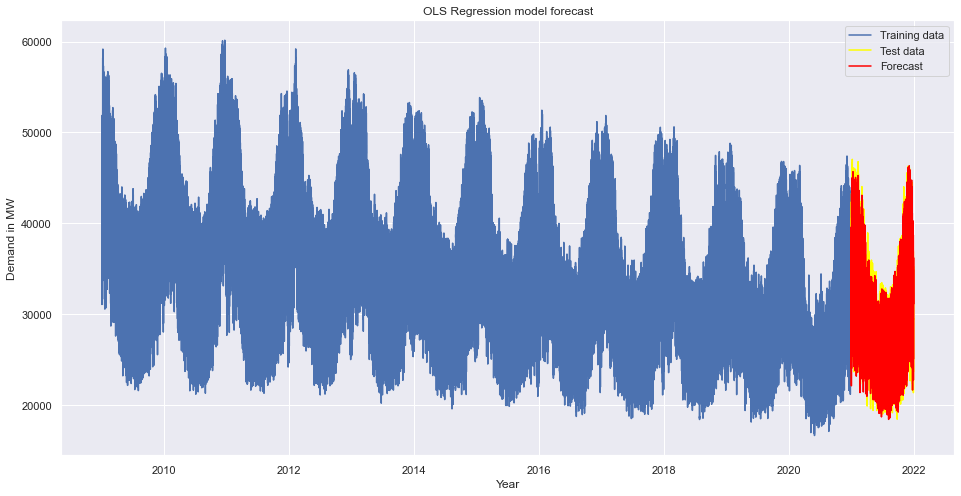

In [25]:
plt.plot(y_train['TSD'], label = 'Training data')
plt.plot(y_test['TSD'], color='yellow', label='Test data')
plt.plot(ols_forecast['TSD_forecast'],color='red', label='Forecast')

plt.xlabel("Year")
plt.ylabel("Demand in MW")
plt.legend(loc='best')
plt.title('OLS Regression model forecast')
plt.show()

## Evaluate the model's performance

As mentioned earlier in the report, the evaluation metrics are MSE, RMSE, MAE & MAPE. The customer function `evaluate_model` will carry out these evaluations at once and will be used again in the project.

In terms of training and prediction speed, both tasks were completed in **2.72s** and **31.3ms** respectively using CPU computations. This is a very respectable result indeed.

In [26]:
def evaluate_model(test,pred,model_name):
    model_mae = mae(test,pred)
    model_mape = mape(test,pred)
    model_mse = mse(test, pred)
    model_rmse = sqrt(model_mse)
    
    print(f"{model_name} MAE: {model_mae: .2f}.")
    print(f"{model_name} MAPE: {model_mape: .2f}%.")
    print(f"{model_name} MSE: {model_mse: .2f}.")
    print(f"{model_name} RMSE: {model_rmse: .2f}.")

evaluate_model(y_test['TSD'],ols_forecast['TSD_forecast'],'OLS Regression')

OLS Regression MAE:  1238.17.
OLS Regression MAPE:  0.04%.
OLS Regression MSE:  2658009.98.
OLS Regression RMSE:  1630.34.


In [27]:
%%time
ols_forecast_train = X_train.copy()
ols_forecast_train['TSD_forecast'] = ols_model.predict(ols_forecast_train)

Wall time: 364 ms


In [28]:
evaluate_model(y_train['TSD'],ols_forecast_train['TSD_forecast'],'OLS Regression (train)')

OLS Regression (train) MAE:  1125.74.
OLS Regression (train) MAPE:  0.03%.
OLS Regression (train) MSE:  2469078.58.
OLS Regression (train) RMSE:  1571.33.


## Interpreting the results

The evaluation carried out on the test data shows a mean absolute percentage error of 0.04% wich is very good indeed. It proves that the model is accurate and will output sensible forecasts.

### Check for over-fitting

In order to look for signs of over-fitting, predictions made on the training data have to evaluated as well. If the MSE (or RMSE) of the model on the test data is substantially higher than the MSE obtained on the training data, this is a sign of overfitting [6: source reference Hands on ML book]. When comparing the RMSE of the test data (1630.34) against that of the training data (1571.33), it shows a small enough difference indicating the model is not over-fitted.

## Verdict

The base Linear Regression model has performed very well will mininal need to hyperparameter tuning. A very impressive performance indeed.

# XGBoost Model

XGBoost is an ensemble learning algorithm that makes use of gradient boosting to optimise the performance of regression or classification models [[8]](https://arxiv.org/pdf/1603.02754.pdf). At high level, gradient boosting works by adding predictors sequentially, each one correcting it's predecessor [6]. Like any other regression model, it is well suited for time series forecasting which is why it is one of the chosen models in this project.

In terms of pre-processing, decision trees do not require data normalisation [6]. An XGBoost Regressor can therefore be train using the features dataset directly without the need to run it through a scaler.

## Train the model

In [29]:
%%time
xgboost_model = XGBRegressor(n_estimators=1000,
                             max_depth=4,
                             eta=0.05,
                             alpha=0.1,
                             reg_lambda=0.1)

xgboost_model.fit(X_train,
                  y_train,
                  eval_set=[(X_train, y_train),(X_test, y_test)],
                  early_stopping_rounds=10,
                  verbose=True)

[0]	validation_0-rmse:33069.26172	validation_1-rmse:28614.49609
[1]	validation_0-rmse:31424.92383	validation_1-rmse:27193.57812
[2]	validation_0-rmse:29863.01758	validation_1-rmse:25843.21875
[3]	validation_0-rmse:28379.27539	validation_1-rmse:24564.49805
[4]	validation_0-rmse:26970.01758	validation_1-rmse:23348.10742
[5]	validation_0-rmse:25631.54492	validation_1-rmse:22185.88086
[6]	validation_0-rmse:24360.23438	validation_1-rmse:21092.65820
[7]	validation_0-rmse:23152.60742	validation_1-rmse:20048.81250
[8]	validation_0-rmse:22005.87305	validation_1-rmse:19064.96680
[9]	validation_0-rmse:20916.51562	validation_1-rmse:18126.20117
[10]	validation_0-rmse:19882.09570	validation_1-rmse:17233.16797
[11]	validation_0-rmse:18899.75391	validation_1-rmse:16385.35547
[12]	validation_0-rmse:17966.60156	validation_1-rmse:15582.34180
[13]	validation_0-rmse:17080.70312	validation_1-rmse:14825.80469
[14]	validation_0-rmse:16239.46973	validation_1-rmse:14104.39453
[15]	validation_0-rmse:15440.65039	

[130]	validation_0-rmse:1462.78455	validation_1-rmse:1728.32300
[131]	validation_0-rmse:1461.32507	validation_1-rmse:1727.79895
[132]	validation_0-rmse:1460.32056	validation_1-rmse:1727.11511
[133]	validation_0-rmse:1459.81836	validation_1-rmse:1726.42798
[134]	validation_0-rmse:1458.92627	validation_1-rmse:1726.07971
[135]	validation_0-rmse:1457.16064	validation_1-rmse:1725.44788
[136]	validation_0-rmse:1455.62647	validation_1-rmse:1723.46094
[137]	validation_0-rmse:1454.93884	validation_1-rmse:1722.98621
[138]	validation_0-rmse:1453.62207	validation_1-rmse:1722.13794
[139]	validation_0-rmse:1452.89917	validation_1-rmse:1721.18457
[140]	validation_0-rmse:1452.18298	validation_1-rmse:1719.92407
[141]	validation_0-rmse:1450.53052	validation_1-rmse:1718.29309
[142]	validation_0-rmse:1449.73706	validation_1-rmse:1717.90796
[143]	validation_0-rmse:1448.34106	validation_1-rmse:1717.50330
[144]	validation_0-rmse:1447.54639	validation_1-rmse:1717.30603
[145]	validation_0-rmse:1446.23914	valid

XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.05, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.0500000007,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.100000001, reg_lambda=0.1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

## Hyperparameter tuning

The first XGBoost regressor model was trained using the parameter `n_estimators=1000` only. This resulted in an training RMSE of circa 900 and testing RMSE of circa 1900; this is a clear sign of overfitting. The library's documentation [[9]](https://xgboost.readthedocs.io/en/stable/parameter.html) indicates that tuning the following parameters will help with overfitting problems:

* `max_depth`: controls the maximum depth of each decision tree, the higher it is the more complex the model is with a higher risk of overfitting. The default value is 6; tuning it to 4 showed positive results (decrease in delta between train RMSE & test RMSE).
* `eta`: controls the learning rate, the default is set to 0.3; lowering it to 0.05 showed positive results.
* `alpha` & `reg_lambda`: both parameters control regulaisation, setting them both to 0.1 showed positive results.

The final model has a training RMSE of 1416.99 and testing RMSE of 1707.45 which is acceptable.

## Use the model to predict/forecast

In [30]:
%%time
xgboost_forecast = X_test.copy()
xgboost_forecast['TSD_forecast'] = xgboost_model.predict(X_test)

Wall time: 61 ms


## Plot the results

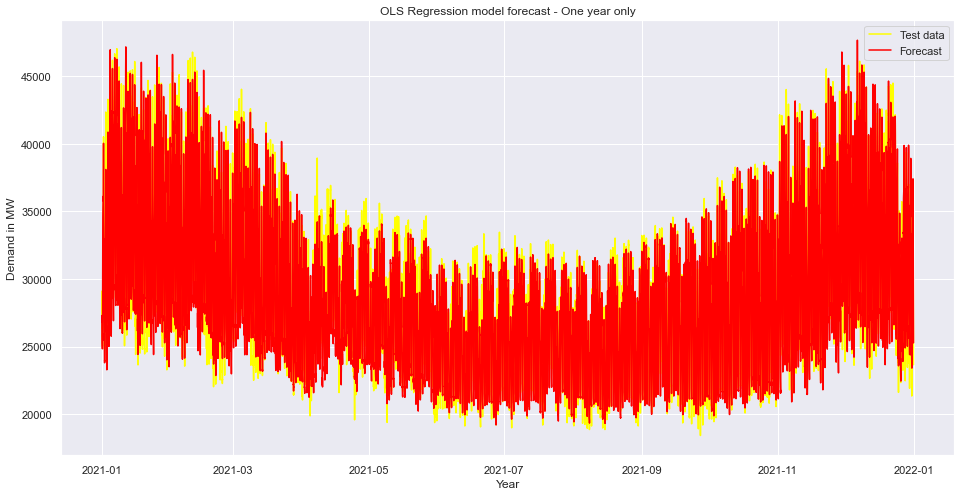

In [31]:
plt.plot(y_test['TSD'], color='yellow', label='Test data')
plt.plot(xgboost_forecast['TSD_forecast'],color='red', label='Forecast')

plt.xlabel("Year")
plt.ylabel("Demand in MW")
plt.legend(loc='best')
plt.title('OLS Regression model forecast - One year only')
plt.show()

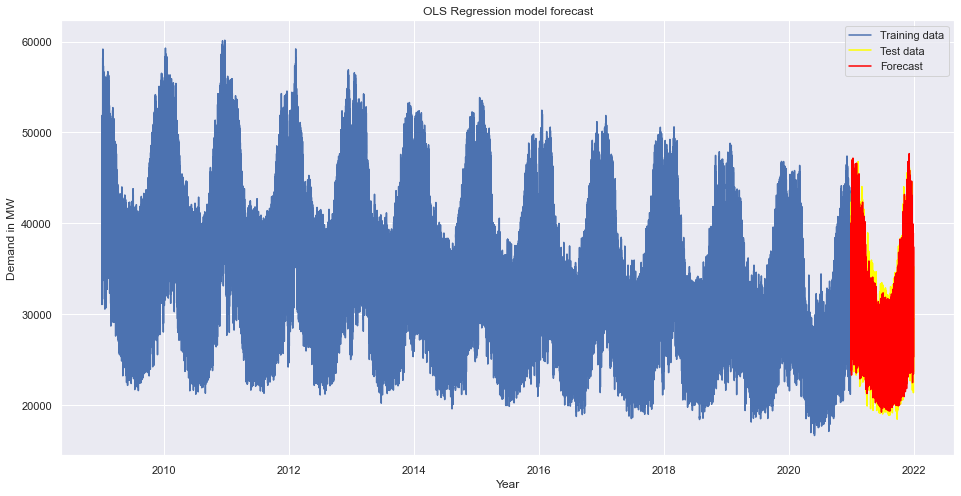

In [32]:
plt.plot(y_train['TSD'], label = 'Training data')
plt.plot(y_test['TSD'], color='yellow', label='Test data')
plt.plot(xgboost_forecast['TSD_forecast'],color='red', label='Forecast')

plt.xlabel("Year")
plt.ylabel("Demand in MW")
plt.legend(loc='best')
plt.title('OLS Regression model forecast')
plt.show()

In [33]:
evaluate_model(y_test['TSD'],xgboost_forecast['TSD_forecast'],'XGBoost Regression')

XGBoost Regression MAE:  1315.21.
XGBoost Regression MAPE:  0.04%.
XGBoost Regression MSE:  2908822.08.
XGBoost Regression RMSE:  1705.53.


## Evaluate the model's performance

In terms of training and prediction speed, both tasks were completed in **2min 49s** and **61ms** respectively using CPU computations. This is a very respectable result indeed.

## Interpreting the results

The evaluation carried out on the test data shows a mean absolute percentage error of 0.04% wich is very good indeed. It proves that the model is accurate and will output sensible forecasts.


## Verdict

The XGBoost Regression model has performed well overall, however, it required a fair amount of hyperparameter tuning to achieve an accetable level of performance. When the time to predict is taken into consideration, it is difficult to justified the use of XGBoost in comparison to the baseline Linear Regression model.

# Ridge Regression Model

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients [[10]](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification).

## Further pre-processing

Similar to the baseline linear regression model, the Ridge model requires the features dataset to be scaled. The same scaled training and testing sets used for the OLS model can be reused here.

## Train the model

In [34]:
%%time
# Declare the regression model
ridge_model = Ridge(alpha=0.5)

# Train it with the scaled train features
ridge_model.fit(X_train_scaled,y_train_scaled)

Wall time: 772 ms


Ridge(alpha=0.5)

## Use the model to predict/forecast

In [35]:
%%time
ridge_forecast = X_test.copy()
ridge_forecast['TSD_forecast'] = ridge_model.predict(X_test)

Wall time: 33 ms


## Plot the results

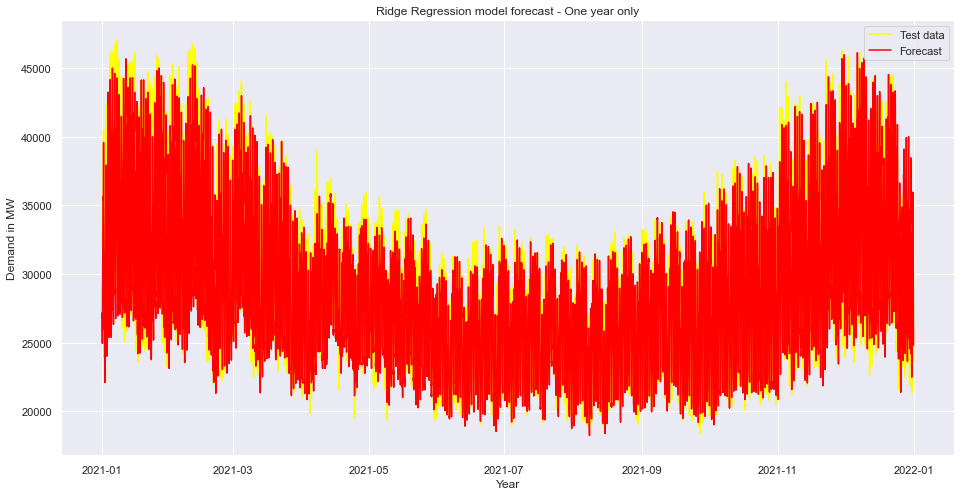

In [36]:
plt.plot(y_test['TSD'], color='yellow', label='Test data')
plt.plot(ridge_forecast['TSD_forecast'],color='red', label='Forecast')

plt.xlabel("Year")
plt.ylabel("Demand in MW")
plt.legend(loc='best')
plt.title('Ridge Regression model forecast - One year only')
plt.show()

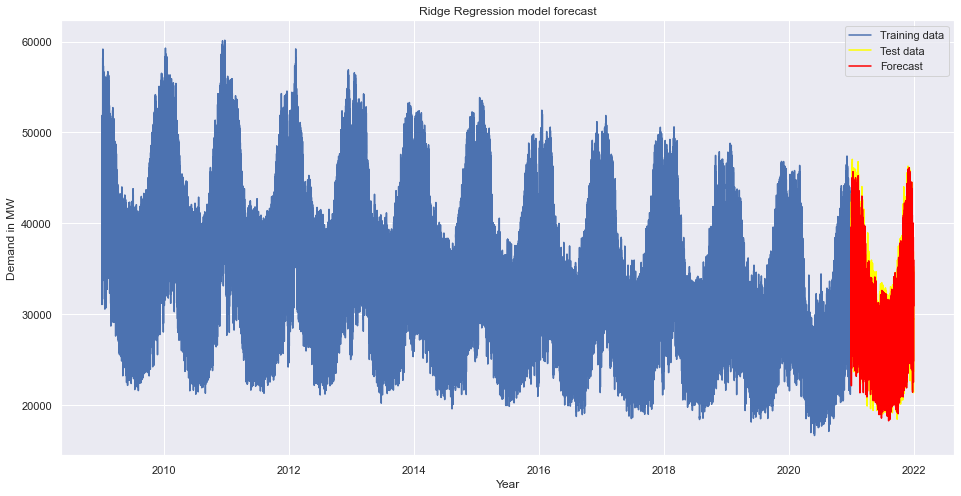

In [37]:
plt.plot(y_train['TSD'], label = 'Training data')
plt.plot(y_test['TSD'], color='yellow', label='Test data')
plt.plot(ridge_forecast['TSD_forecast'],color='red', label='Forecast')

plt.xlabel("Year")
plt.ylabel("Demand in MW")
plt.legend(loc='best')
plt.title('Ridge Regression model forecast')
plt.show()

## Evaluate the model's performance

In terms of training and prediction speed, both tasks were completed in **772ms** and **33ms** respectively using CPU computations. This is a very respectable result indeed.

In [38]:
evaluate_model(y_test['TSD'],ridge_forecast['TSD_forecast'],'Ridge Regression')

Ridge Regression MAE:  1259.01.
Ridge Regression MAPE:  0.04%.
Ridge Regression MSE:  2714632.38.
Ridge Regression RMSE:  1647.61.


In [39]:
%%time
ridge_forecast_train = X_train.copy()
ridge_forecast_train['TSD_forecast'] = ridge_model.predict(ridge_forecast_train)

Wall time: 371 ms


In [40]:
evaluate_model(y_train['TSD'],ridge_forecast_train['TSD_forecast'],'Ridge Regression (train)')

Ridge Regression (train) MAE:  1147.06.
Ridge Regression (train) MAPE:  0.03%.
Ridge Regression (train) MSE:  2519699.48.
Ridge Regression (train) RMSE:  1587.36.


## Interpreting the results

The evaluation carried out on the test data shows a mean absolute percentage error of 0.04% wich is very good indeed. It proves that the model is accurate and will output sensible forecasts.

### Check for over-fitting

The model has a training RMSE of 1587.36 and testing RMSE of 1647.61 which is acceptable.

## Verdict

The Ridge Regression model has performed very well will mininal need to hyperparameter tuning. A clear upgrade on the base Linear Regression model. It is also most definitely a more suitable model for time series forcasting than XGBoost when considering the training time of both models.

# Conclusion

All three models have performed very well in the grand scheme of things. They've all achieved a mean absolute percentage error of 0.04% which speak volumes of the prediction capability and accuracy of these models. All three models have been trained without overfitting or underfitting.

Having said this, when time to train, hyperparamete tuning and necessary pre-processing are considered, the clear winning model is the Ridge Regression model. It managed to get trained in the quickest time (947ms) without compromising on the accuracy of the forecasts.

The XGBoost model will have its place in more complex machine learning pipelines, however, deeper knowledge of the algorithm and its hyperparameters is required in order to get the most out of it.

# References

[1] 	National Grid, "National Grid ESO Data Portal," National Grid, [Online]. Available: https://data.nationalgrideso.com/demand/historic-demand-data. [Accessed 26 02 2022].

[2] 	National Grid, "NGESO Open Licence," National Grid, [Online]. Available: https://data.nationalgrideso.com/licence. [Accessed 26 02 2022].

[3] 	A. Thakur, Approaching Almost Any Machine Learning Problem, London: Amazon, 2019. 

[4] 	J. Brownlee, "https://data.nationalgrideso.com/licence," Machine Learning Mastery, 14 Dec 2016. [Online]. Available: https://machinelearningmastery.com/basic-feature-engineering-time-series-data-python/. [Accessed 03 03 2022].

[5] 	F. Lazzeri, "Introduction to feature engineering for time series forecasting," Medium, 05 10 2021. [Online]. Available: https://medium.com/data-science-at-microsoft/introduction-to-feature-engineering-for-time-series-forecasting-620aa55fcab0. [Accessed 03 03 2022].

[6] 	A. Geron, Hands-on Machine Learning with Sckikit-Learn, Keras & Tensorflow, Sebastopol, CA: O'Reilly, 2019. 

[7] 	A. Burkov, The Hundred-Page Machine Learning Book, Andriy Burkov, 2019. 

[8] 	T. Chen and C. Guestrin, "XGBoost: A Scalable Tree Boosting System," ACM, 2016. 

[9] 	XGBoost, "XGBoost Parameters," XGBoost, [Online]. Available: https://xgboost.readthedocs.io/en/stable/parameter.html. [Accessed 06 03 2022].

[10] 	Scikit-Learn, "Linear Models," Scikit-Learn, [Online]. Available: https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification. [Accessed 06 03 2022].

